#  Analysis of US Economic Data & Building a Dashboard

## 1- Data Collection

### (i) Read GDP Table

In [14]:
import pandas as pd

In [15]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv'
gdp = pd.read_csv(url)
gdp.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


### (ii) Read Unemployment Table

In [16]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'
unemployment = pd.read_csv(url)
unemployment.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


## 2- Data Understanding

### (i) Understand GDP Table

In [5]:
gdp.tail()

,date,level-current,level-chained,change-current,change-chained
64,2012,16155.3,15354.6,3.6,1.8
65,2013,16691.5,15612.2,4.4,2.5
66,2014,17427.6,16013.3,4.0,2.9
67,2015,18120.7,16471.5,2.7,1.6
68,2016,18624.5,16716.2,4.2,2.2


In [4]:
gdp.columns

Index(['date', 'level-current', 'level-chained', 'change-current',
       'change-chained'],
      dtype='object')

In [5]:
gdp.describe()

,date,level-current,level-chained,change-current,change-chained
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1982.000000,5664.008696,7957.673913,6.424638,3.184058
std,20.062403,5692.268651,4585.249853,3.200616,2.341168
min,1948.000000,272.800000,2008.900000,-1.800000,-2.500000
25%,1965.000000,743.700000,3976.700000,4.300000,1.900000
50%,1982.000000,3345.000000,6617.700000,6.000000,3.200000
75%,1999.000000,9660.600000,12065.900000,8.400000,4.600000
max,2016.000000,18624.500000,16716.200000,15.700000,8.700000


In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 5 columns):
date              69 non-null int64
level-current     69 non-null float64
level-chained     69 non-null float64
change-current    69 non-null float64
change-chained    69 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.8 KB


In [7]:
gdp.dtypes

date                int64
level-current     float64
level-chained     float64
change-current    float64
change-chained    float64
dtype: object

### (ii) Understand Unemployment Table

In [7]:
unemployment.head()

,date,unemployment
0,1948,3.750000
1,1949,6.050000
2,1950,5.208333
3,1951,3.283333
4,1952,3.025000


In [75]:
unemployment.tail()

,date,unemployment
64,2012,8.075000
65,2013,7.358333
66,2014,6.158333
67,2015,5.275000
68,2016,4.875000


In [10]:
unemployment.columns

Index(['date', 'unemployment'], dtype='object')

In [12]:
unemployment.describe()

,date,unemployment
count,69.000000,69.000000
mean,1982.000000,5.810628
std,20.062403,1.608657
min,1948.000000,2.925000
25%,1965.000000,4.741667
50%,1982.000000,5.591667
75%,1999.000000,6.850000
max,2016.000000,9.708333


In [14]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 2 columns):
date            69 non-null int64
unemployment    69 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.2 KB


In [15]:
unemployment.dtypes

date              int64
unemployment    float64
dtype: object

## 2- Data Cleaning

In [17]:
gdp.columns

Index(['date', 'level-current', 'level-chained', 'change-current',
       'change-chained'],
      dtype='object')

<b>In gdp table, there are only 2 important columns that we have to use for analysis. These are "date" & "change-current". So we delete other 3 columns from GDP dataframe. </b>

In [20]:
gdp.drop(['level-current', 'level-chained', 'change-chained'], axis=1, inplace=True)

In [22]:
gdp.columns

Index(['date', 'change-current'], dtype='object')

## 3- Data Visualization

### (i) Visualize GDP Table

### Scatter Plot

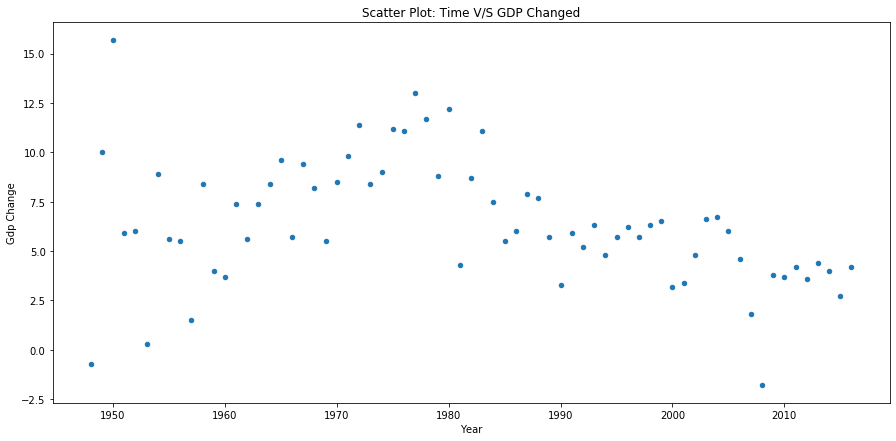

In [60]:
import matplotlib.pyplot as plt
gdp.plot(kind = 'scatter', x = 'date', y = 'change-current', figsize=(15,7))

plt.title("Scatter Plot: Time V/S GDP Changed")
plt.xlabel("Year")
plt.ylabel("Gdp Change")
plt.show()

### Line Chart

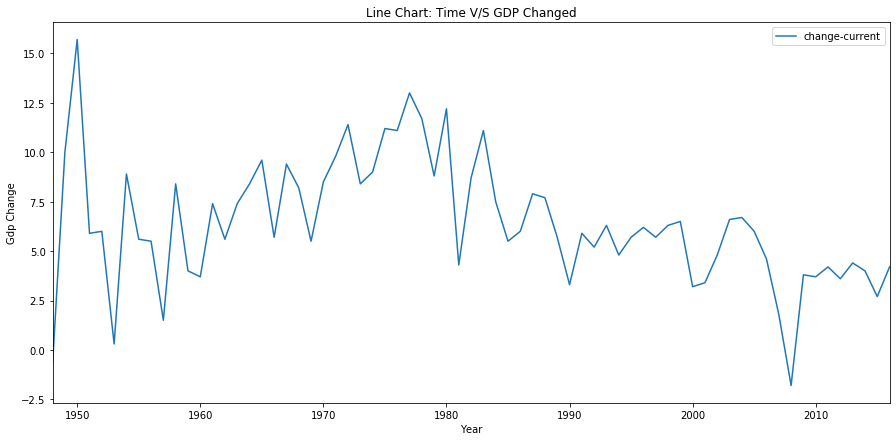

In [61]:
import matplotlib.pyplot as plt
gdp.plot(kind = 'line', x = 'date', y = 'change-current', figsize=(15,7))
plt.title("Line Chart: Time V/S GDP Changed")
plt.xlabel("Year")
plt.ylabel("Gdp Change")
plt.show()

### Bar Chart

AttributeError: module 'matplotlib.dates' has no attribute 'YearlyLocator'

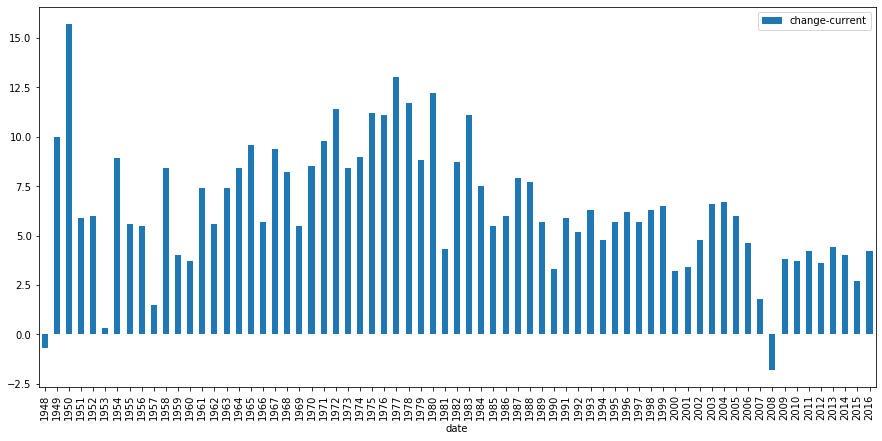

In [44]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set date as index
d = gdp.set_index('date')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
d.plot(kind='bar', ax=ax)

#set ticks every year
ax.xaxis.set_major_locator(mdates.YearlyLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

### (ii) Visualize Unemployment Table

### Scatter Plot

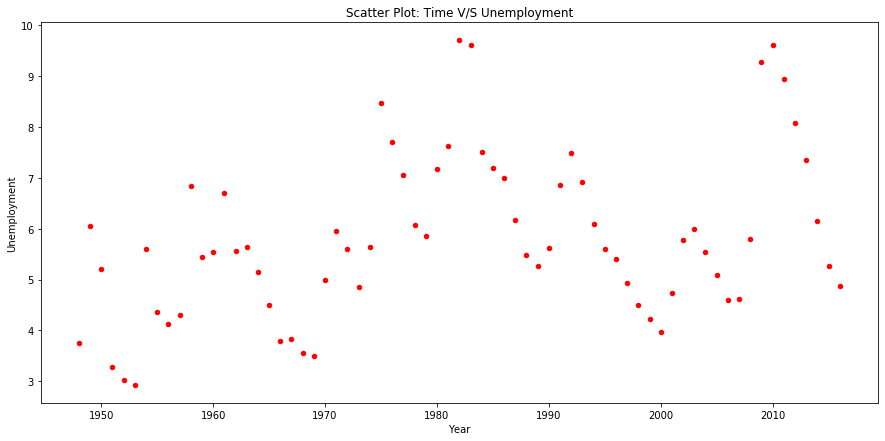

In [64]:
import matplotlib.pyplot as plt
unemployment.plot(kind = 'scatter', x = 'date', y = 'unemployment', figsize=(15,7), color = 'r')
plt.title("Scatter Plot: Time V/S Unemployment")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

### Line Chart

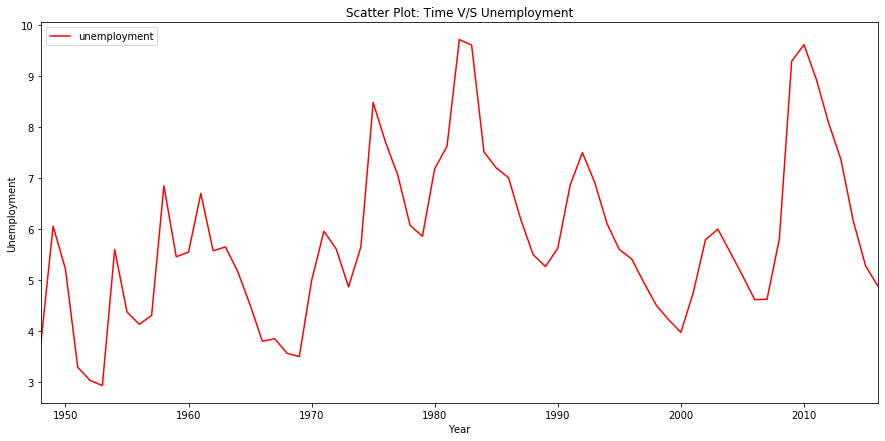

In [65]:
import matplotlib.pyplot as plt
unemployment.plot(kind = 'line', x = 'date', y = 'unemployment', figsize=(15,7), color = 'r')
plt.title("Scatter Plot: Time V/S Unemployment")
plt.xlabel("Year")
plt.ylabel("Unemployment")
plt.show()

### Bar Chart

AttributeError: module 'matplotlib.dates' has no attribute 'YearlyLocator'

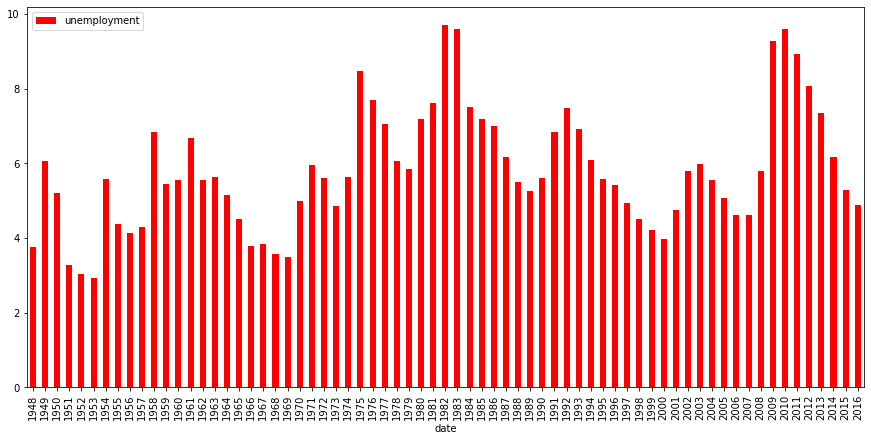

In [66]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

#set date as index
d = unemployment.set_index('date')

#plot data
fig, ax = plt.subplots(figsize=(15,7))
d.plot(kind='bar', ax=ax, color = 'r')

#set ticks every year
ax.xaxis.set_major_locator(mdates.YearlyLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

## 4- Comparison between GDP V/S Unemployment

### By using Line Chart

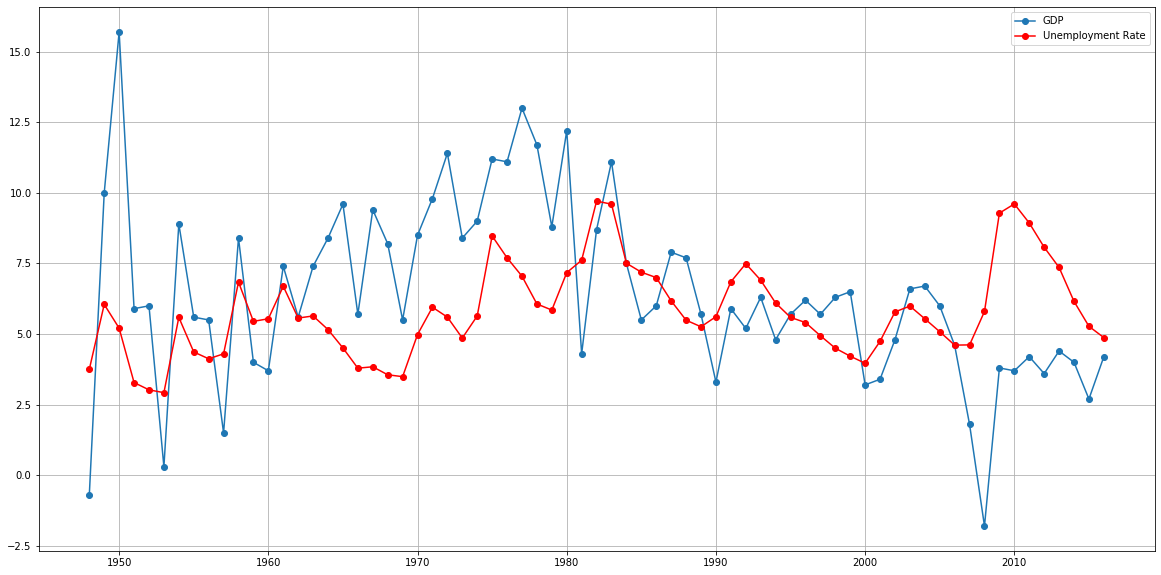

In [80]:
import matplotlib.pyplot as plt
date = gdp['date']
gdp_change = gdp['change-current']
unemployment_rate = unemployment['unemployment']
plt.figure(figsize=(20,10))
plt.plot(date, gdp_change, marker = 'o', label = 'GDP')
plt.plot(date, unemployment_rate, marker = 'o', color = 'r', label = 'Unemployment Rate')
labels = ['GDP', 'Unemployment Rate']
#cubes = [i*i*i for i in numbers]
#plt.plot(numbers, cubes, marker = 'o')
plt.grid()
plt.legend(labels)
plt.show()

### By Using Bar Graph

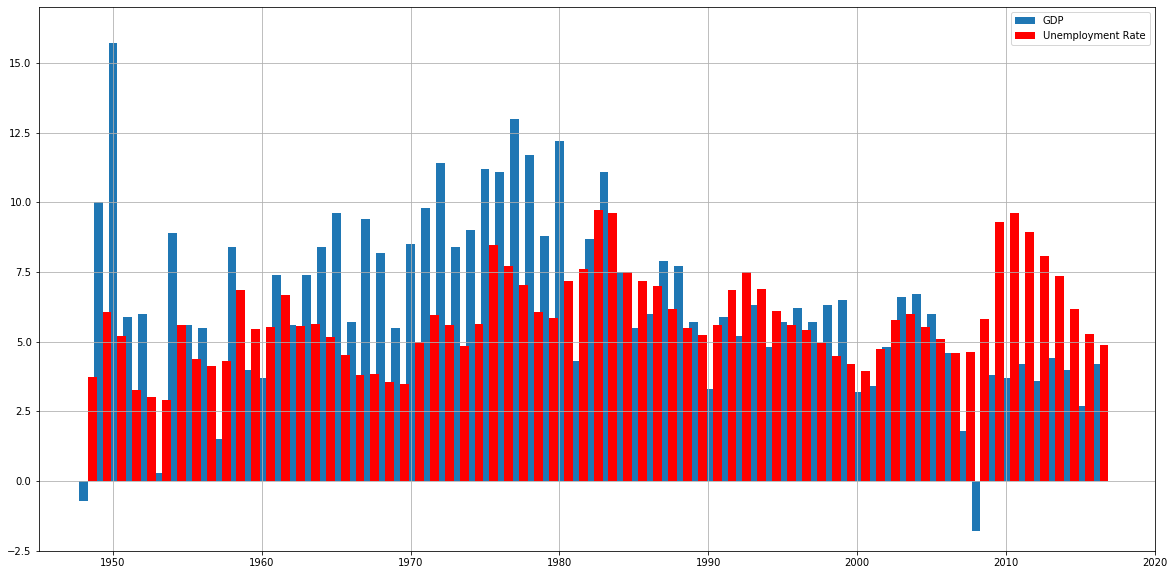

In [9]:
import matplotlib.pyplot as plt
date = gdp['date']
gdp_change = gdp['change-current']
unemployment_rate = unemployment['unemployment']
width = 0.6
plt.figure(figsize=(20,10))
plt.bar(date, gdp_change, label = 'GDP', width = width)
plt.bar(date+width, unemployment_rate, color = 'r', label = 'Unemployment Rate', width = width)
labels = ['GDP', 'Unemployment Rate']
plt.axis([1945, 2020, -2.5, 17])
plt.grid()
plt.legend(labels)
plt.show()

## 5- Making Dashboard

In [13]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend="GDP")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend="Unemployment")
    show(p)
    
links={'GDP':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv',\
       'unemployment':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'}

df_gdp = pd.read_csv(links["GDP"])

# Create your dataframe with column date
x = df_gdp['date']

# Create your dataframe with column change-current
gdp_change = df_gdp['change-current'] 

df_unemp = pd.read_csv(links['unemployment'])

 # Create your dataframe with column unemployment
unemployment = df_unemp['unemployment']
unemployment.head()

title = 'Line Chart: GDP Change V/S Unemployment'# Give your dashboard a string title
file_name = "index.html"
make_dashboard(x=x, gdp_change=gdp_change, unemployment= unemployment, title=title, file_name=file_name)

## Conclusion

From the above data analysis, we can clearly observe that <b>when GDP goes over the Unemployment comes down and when GDP comes down, Unemployment goes over.</b> So the conclusion of <b> US Economic Data Analysis </b> is that <b>"Uemployment is inversely proportional to GDP"</b> 